In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import preprocessing

In [100]:
df = pd.read_csv('african_crises.csv')

In [101]:
df.head(10)

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis
5,1,DZA,Algeria,1875,0,0.051546,0,0,0.0,-20.924178,0,0,0,no_crisis
6,1,DZA,Algeria,1876,0,0.051867,0,0,0.0,-1.769547,0,0,0,no_crisis
7,1,DZA,Algeria,1877,0,0.051867,0,0,0.0,29.116045,0,0,1,no_crisis
8,1,DZA,Algeria,1878,0,0.051948,0,0,0.0,-1.492537,0,0,0,no_crisis
9,1,DZA,Algeria,1879,0,0.052029,0,0,0.0,-16.831357,0,0,0,no_crisis


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 14 columns):
case                               1059 non-null int64
cc3                                1059 non-null object
country                            1059 non-null object
year                               1059 non-null int64
systemic_crisis                    1059 non-null int64
exch_usd                           1059 non-null float64
domestic_debt_in_default           1059 non-null int64
sovereign_external_debt_default    1059 non-null int64
gdp_weighted_default               1059 non-null float64
inflation_annual_cpi               1059 non-null float64
independence                       1059 non-null int64
currency_crises                    1059 non-null int64
inflation_crises                   1059 non-null int64
banking_crisis                     1059 non-null object
dtypes: float64(3), int64(8), object(3)
memory usage: 115.9+ KB


In [103]:
df[pd.isnull(df).any(axis=1)]

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis


In [104]:
print(f'If we drop rows with at least one value missing, we get {df.dropna().shape[0]:,} \
out of {df.shape[0]:,} instances.')

If we drop rows with at least one value missing, we get 1,059 out of 1,059 instances.


In [105]:
#cardinality - we have a lot of 0,1 values but none of the numeric ones needs to be converted into categorical, 
#just categorical banking_crisis into numerical variables 
df.nunique().sort_values()

systemic_crisis                       2
domestic_debt_in_default              2
sovereign_external_debt_default       2
independence                          2
inflation_crises                      2
banking_crisis                        2
currency_crises                       3
gdp_weighted_default                  6
case                                 13
cc3                                  13
country                              13
year                                155
exch_usd                            772
inflation_annual_cpi               1022
dtype: int64

In [106]:
df['banking_crisis'] = df['banking_crisis'] .apply(lambda x: 1 if x == 'crisis' else 0) #converting categorical variable into numeric variable

In [107]:
df.head()

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,1
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,0
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,0
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,0
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,0


In [171]:
cols_boxplot = ['exch_usd','inflation_annual_cpi']
df[cols_boxplot].describe()

,exch_usd,inflation_annual_cpi
count,1059.000000,1059.000000
mean,6.056483,7.596038
std,8.107415,8.773476
min,0.000000,-12.250666
25%,0.195350,2.086162
50%,0.868400,5.762330
75%,8.462750,11.644048
max,20.863850,25.980876


C:\Users\dell\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\dell\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


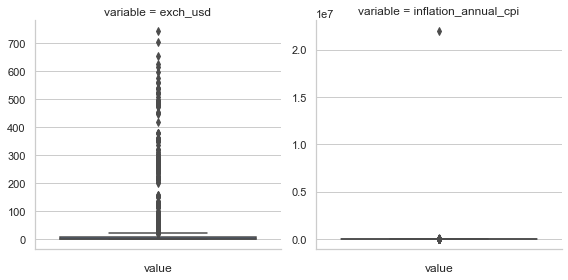

In [109]:
a = pd.melt(df[cols_boxplot + ['year', 'country']], id_vars = ['year', 'country'], value_vars=cols_boxplot)
b = sns.FacetGrid(a, col = 'variable', sharex=False, sharey=False, size=4)
b.map(sns.boxplot, 'value', orient='v')

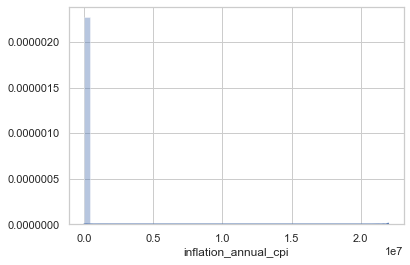

In [110]:
sns.distplot(df['inflation_annual_cpi'])

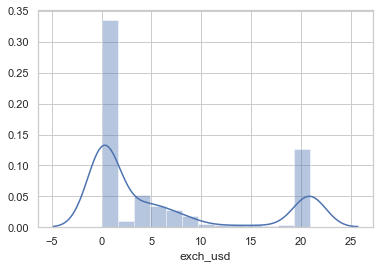

In [170]:
sns.distplot(df['exch_usd'])

In [111]:
q1 = df[cols_boxplot].quantile(0.25)
q3 = df[cols_boxplot].quantile(0.75)
iqr = q3 - q1

df[cols_boxplot] = df[cols_boxplot].clip(q1 - 1.5*iqr, q3 + 1.5*iqr, axis=1)
df[cols_boxplot].describe()

,exch_usd,inflation_annual_cpi
count,1059.000000,1059.000000
mean,6.056483,7.596038
std,8.107415,8.773476
min,0.000000,-12.250666
25%,0.195350,2.086162
50%,0.868400,5.762330
75%,8.462750,11.644048
max,20.863850,25.980876


C:\Users\dell\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\dell\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


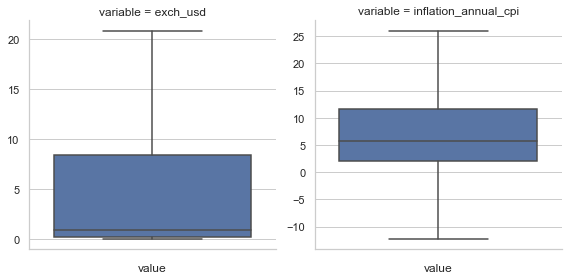

In [112]:
#fixed distributions
a = pd.melt(df[cols_boxplot + ['year', 'country']], id_vars = ['year', 'country'], value_vars=cols_boxplot)
b = sns.FacetGrid(a, col = 'variable', sharex=False, sharey=False, size=4)
b.map(sns.boxplot, 'value', orient='v')

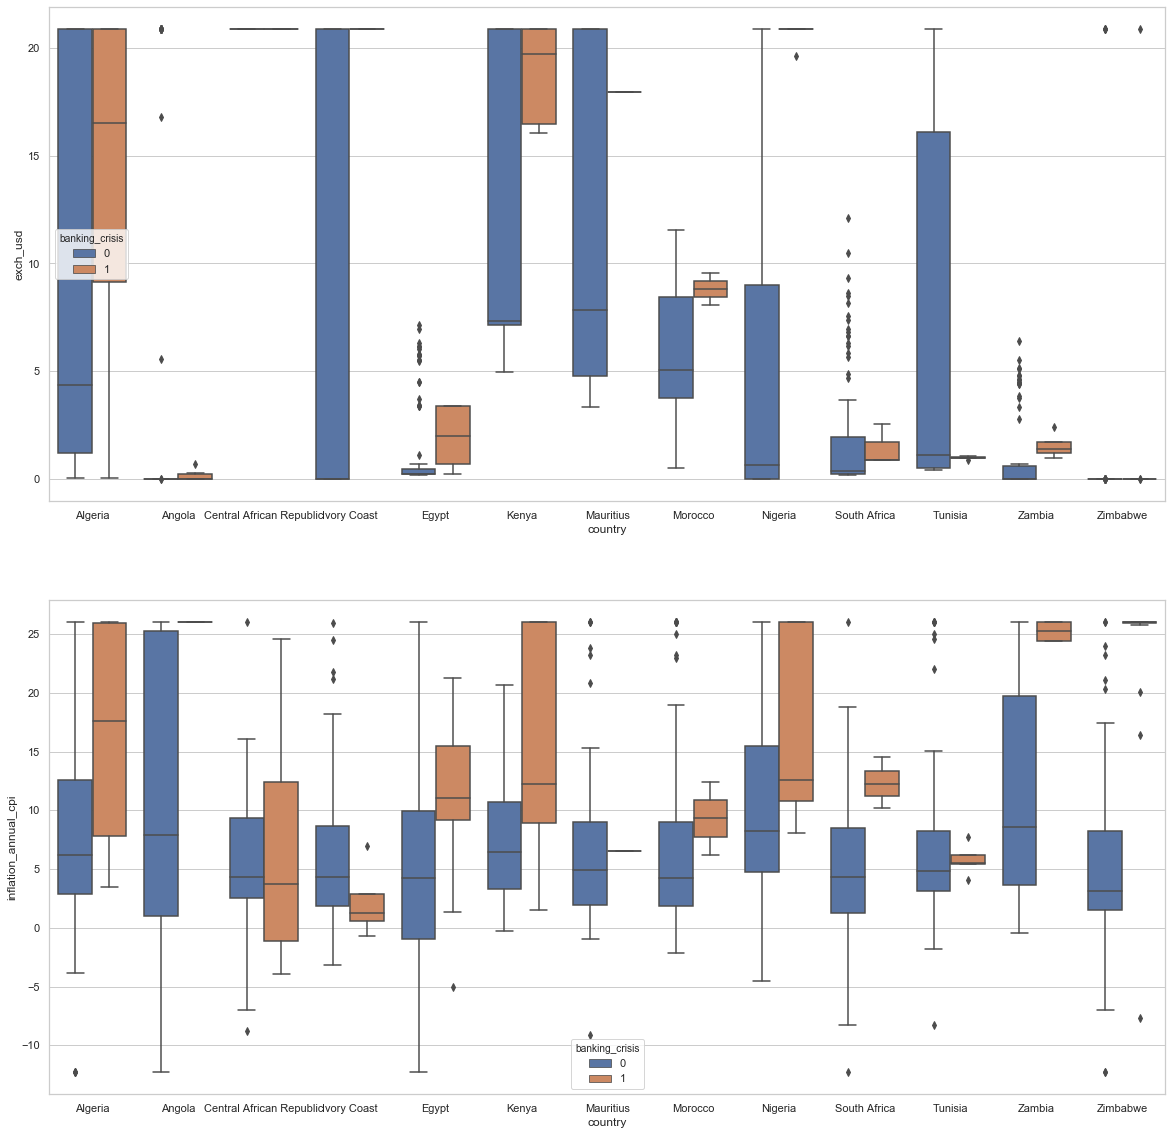

In [113]:
sns.set(style='whitegrid')
plt.figure(figsize=(20,20))
count = 1

for i in cols_boxplot:
    plt.subplot(2,1,count)
    count += 1
    sns.boxplot(x = df['country'], y = df[i], hue = df['banking_crisis'])

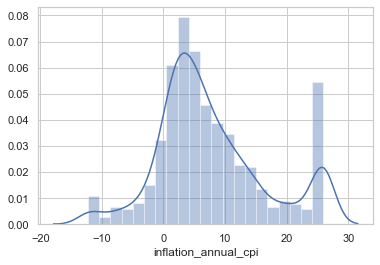

In [114]:
sns.distplot(df['inflation_annual_cpi'])

In [115]:
df.groupby(['country', 'banking_crisis']).size().sort_values(ascending=False)

country                   banking_crisis
Egypt                     0                 144
South Africa              0                 111
Algeria                   0                  81
Zimbabwe                  0                  75
Morocco                   0                  73
Angola                    0                  70
Tunisia                   0                  70
Zambia                    0                  68
Mauritius                 0                  67
Ivory Coast               0                  59
Kenya                     0                  59
Nigeria                   0                  49
Central African Republic  0                  39
                          1                  19
Zimbabwe                  1                  15
Nigeria                   1                  11
Egypt                     1                  11
Kenya                     1                   8
Angola                    1                   7
Tunisia                   1                   5

In [116]:
individual_countries = list(df['country'].unique())

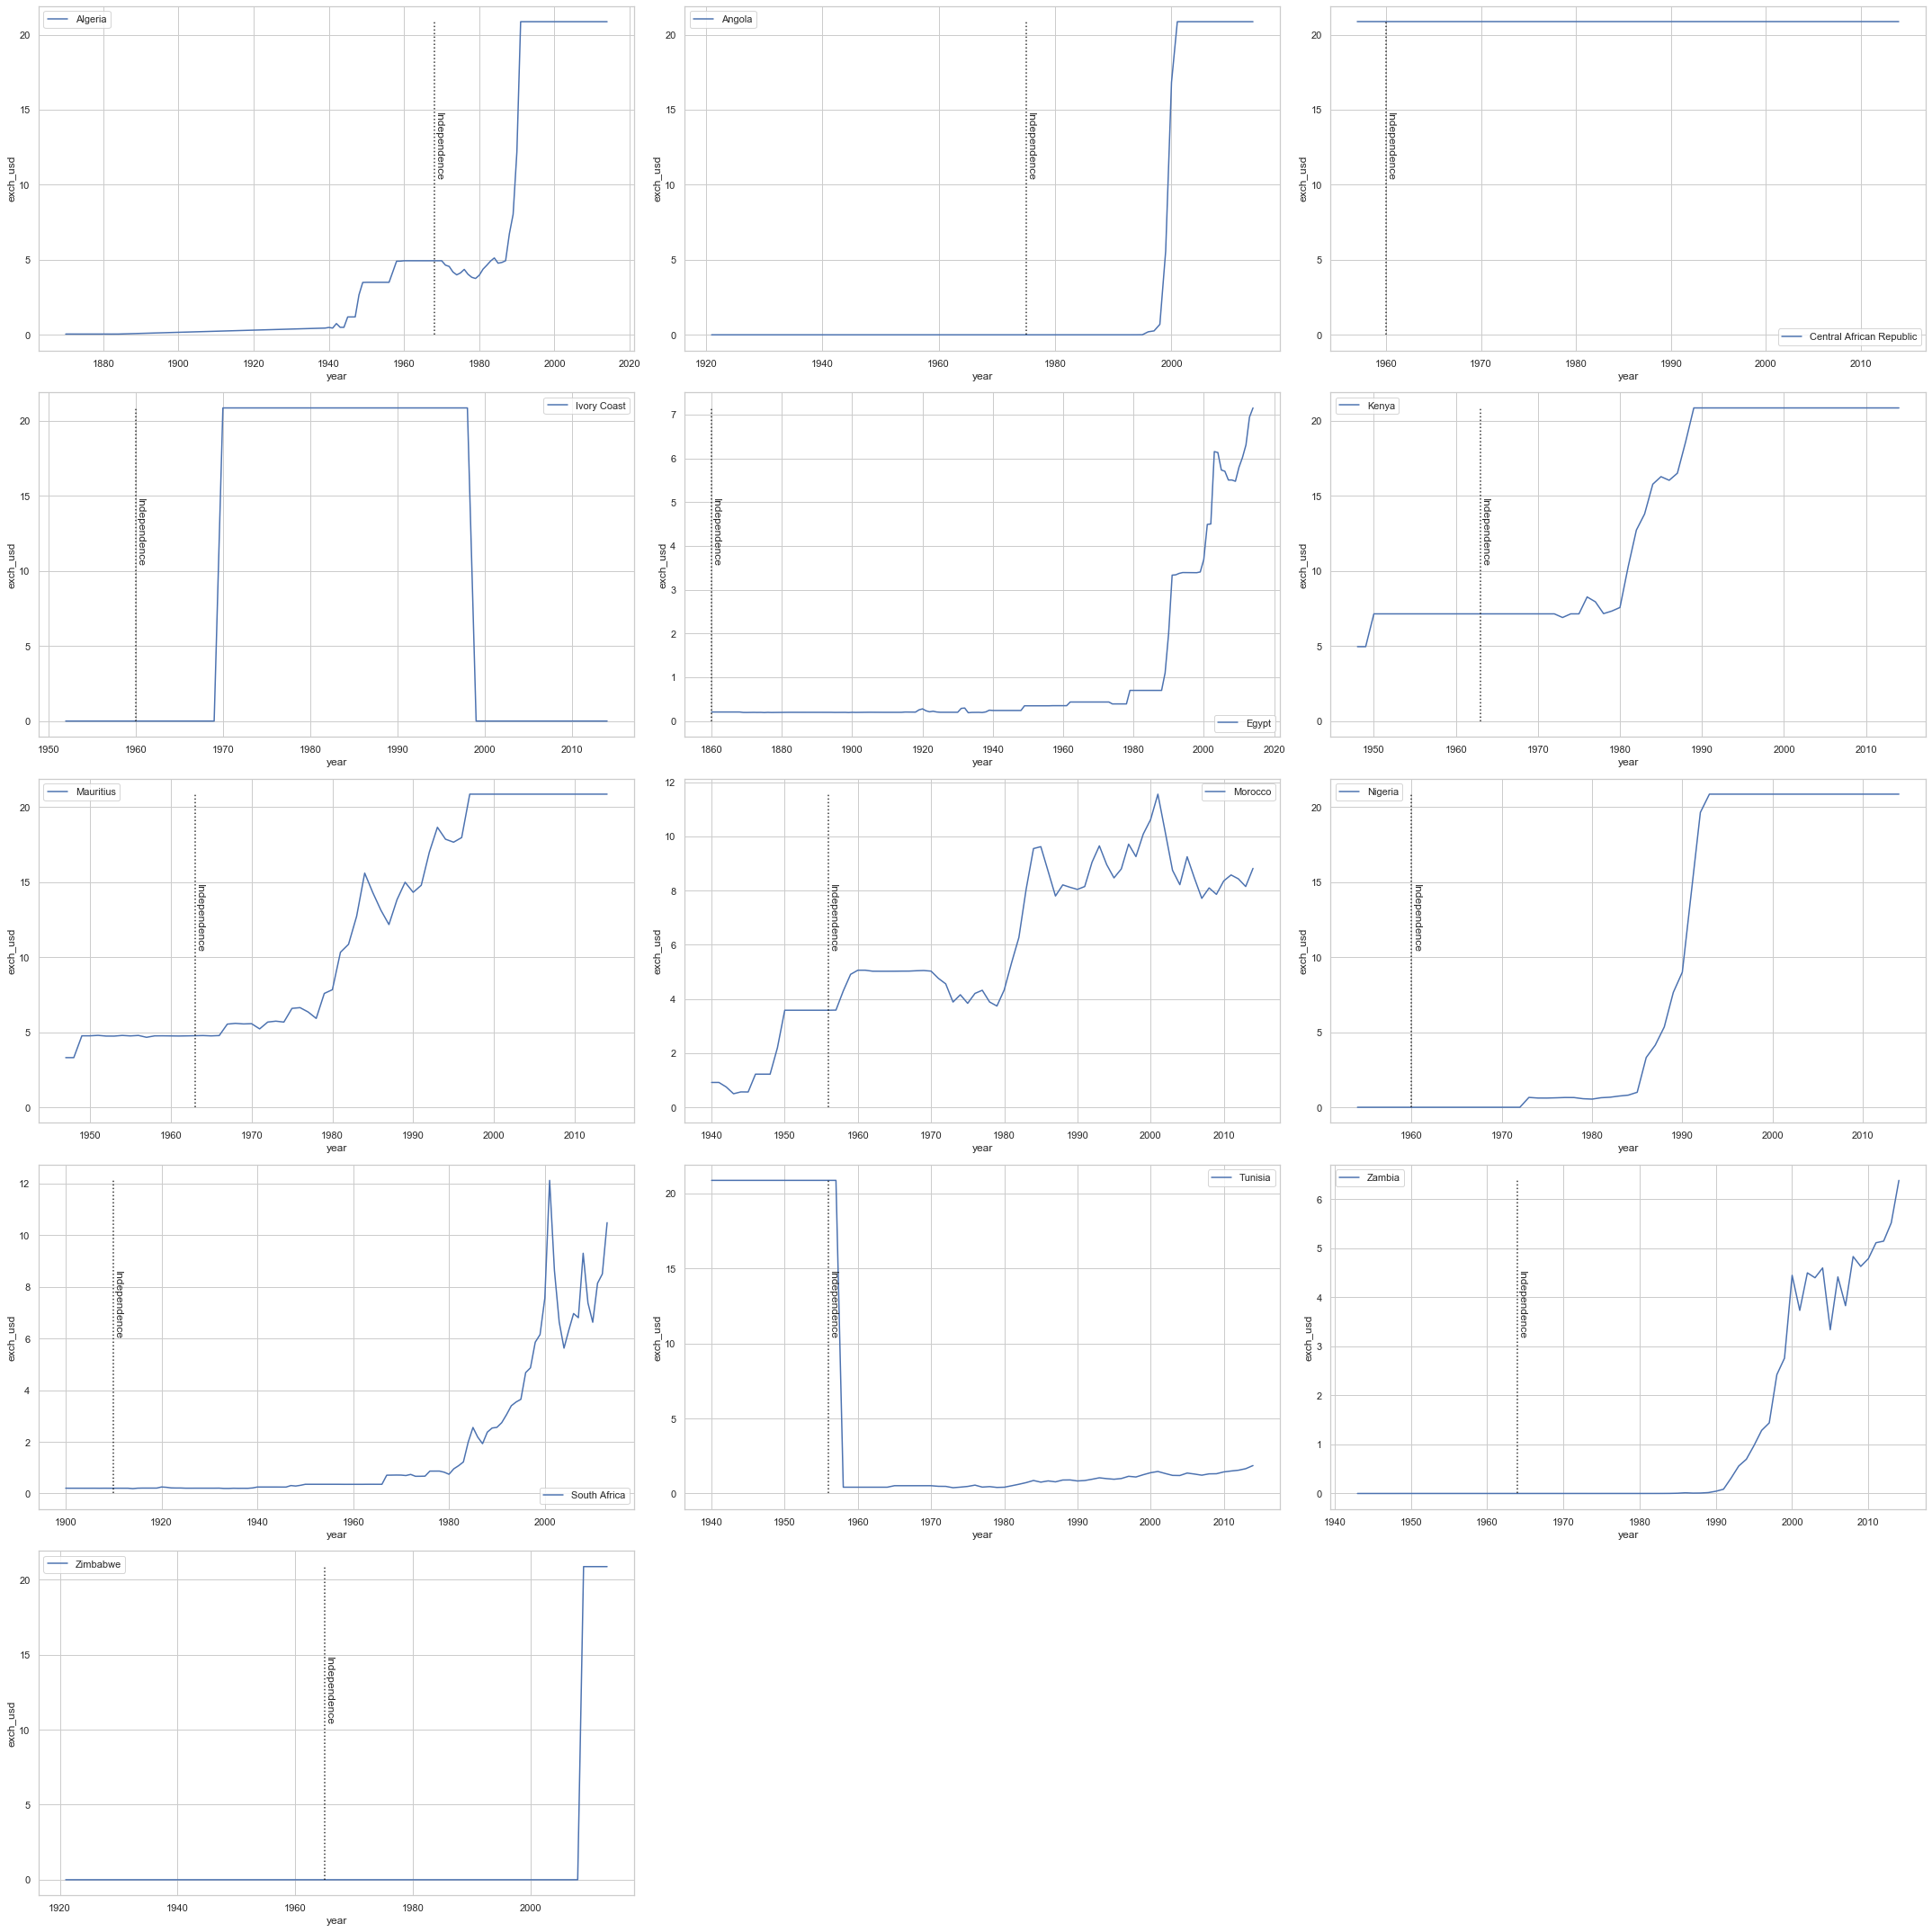

In [117]:
sns.set(style='whitegrid')
plt.figure(figsize=(30,30))
count = 1

for country in individual_countries:
    plt.subplot(5,3,count)
    count+=1
    
    sns.lineplot(df[df.country==country]['year'],
                 df[df.country==country]['exch_usd'],
                 label=country)
                 
  
    plt.plot([np.min(df[np.logical_and(df.country==country,df.independence==1)]['year']),
              np.min(df[np.logical_and(df.country==country,df.independence==1)]['year'])],
             [0,
              np.max(df[df.country==country]['exch_usd'])],
             color='black',
             linestyle='dotted',
             alpha=0.8)
    plt.text(np.min(df[np.logical_and(df.country==country,df.independence==1)]['year']),np.max(df[df.country==country]['exch_usd'])/2,
             'Independence',
             rotation=-90)

    
   
    plt.tight_layout()
    


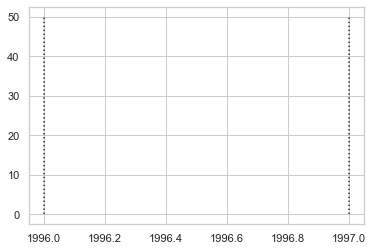

In [118]:
#simplified
x_dolni=[1996,1997]
x_horni=[1996,1997]
plt.plot([x_dolni,x_horni],[0,50], color='black',\
                 linestyle='dotted',\
                 alpha = 0.8)

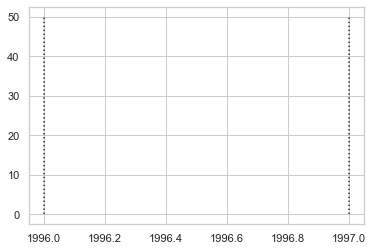

In [119]:
#previous code           
plt.plot([[1996,1997],[1996,1997]],[0,50], color='black',\
                 linestyle='dotted',\
                 alpha = 0.8)

Algeria
Angola
Central African Republic
Ivory Coast
Egypt
Kenya
Mauritius
Morocco
Nigeria
South Africa
Tunisia
Zambia
Zimbabwe


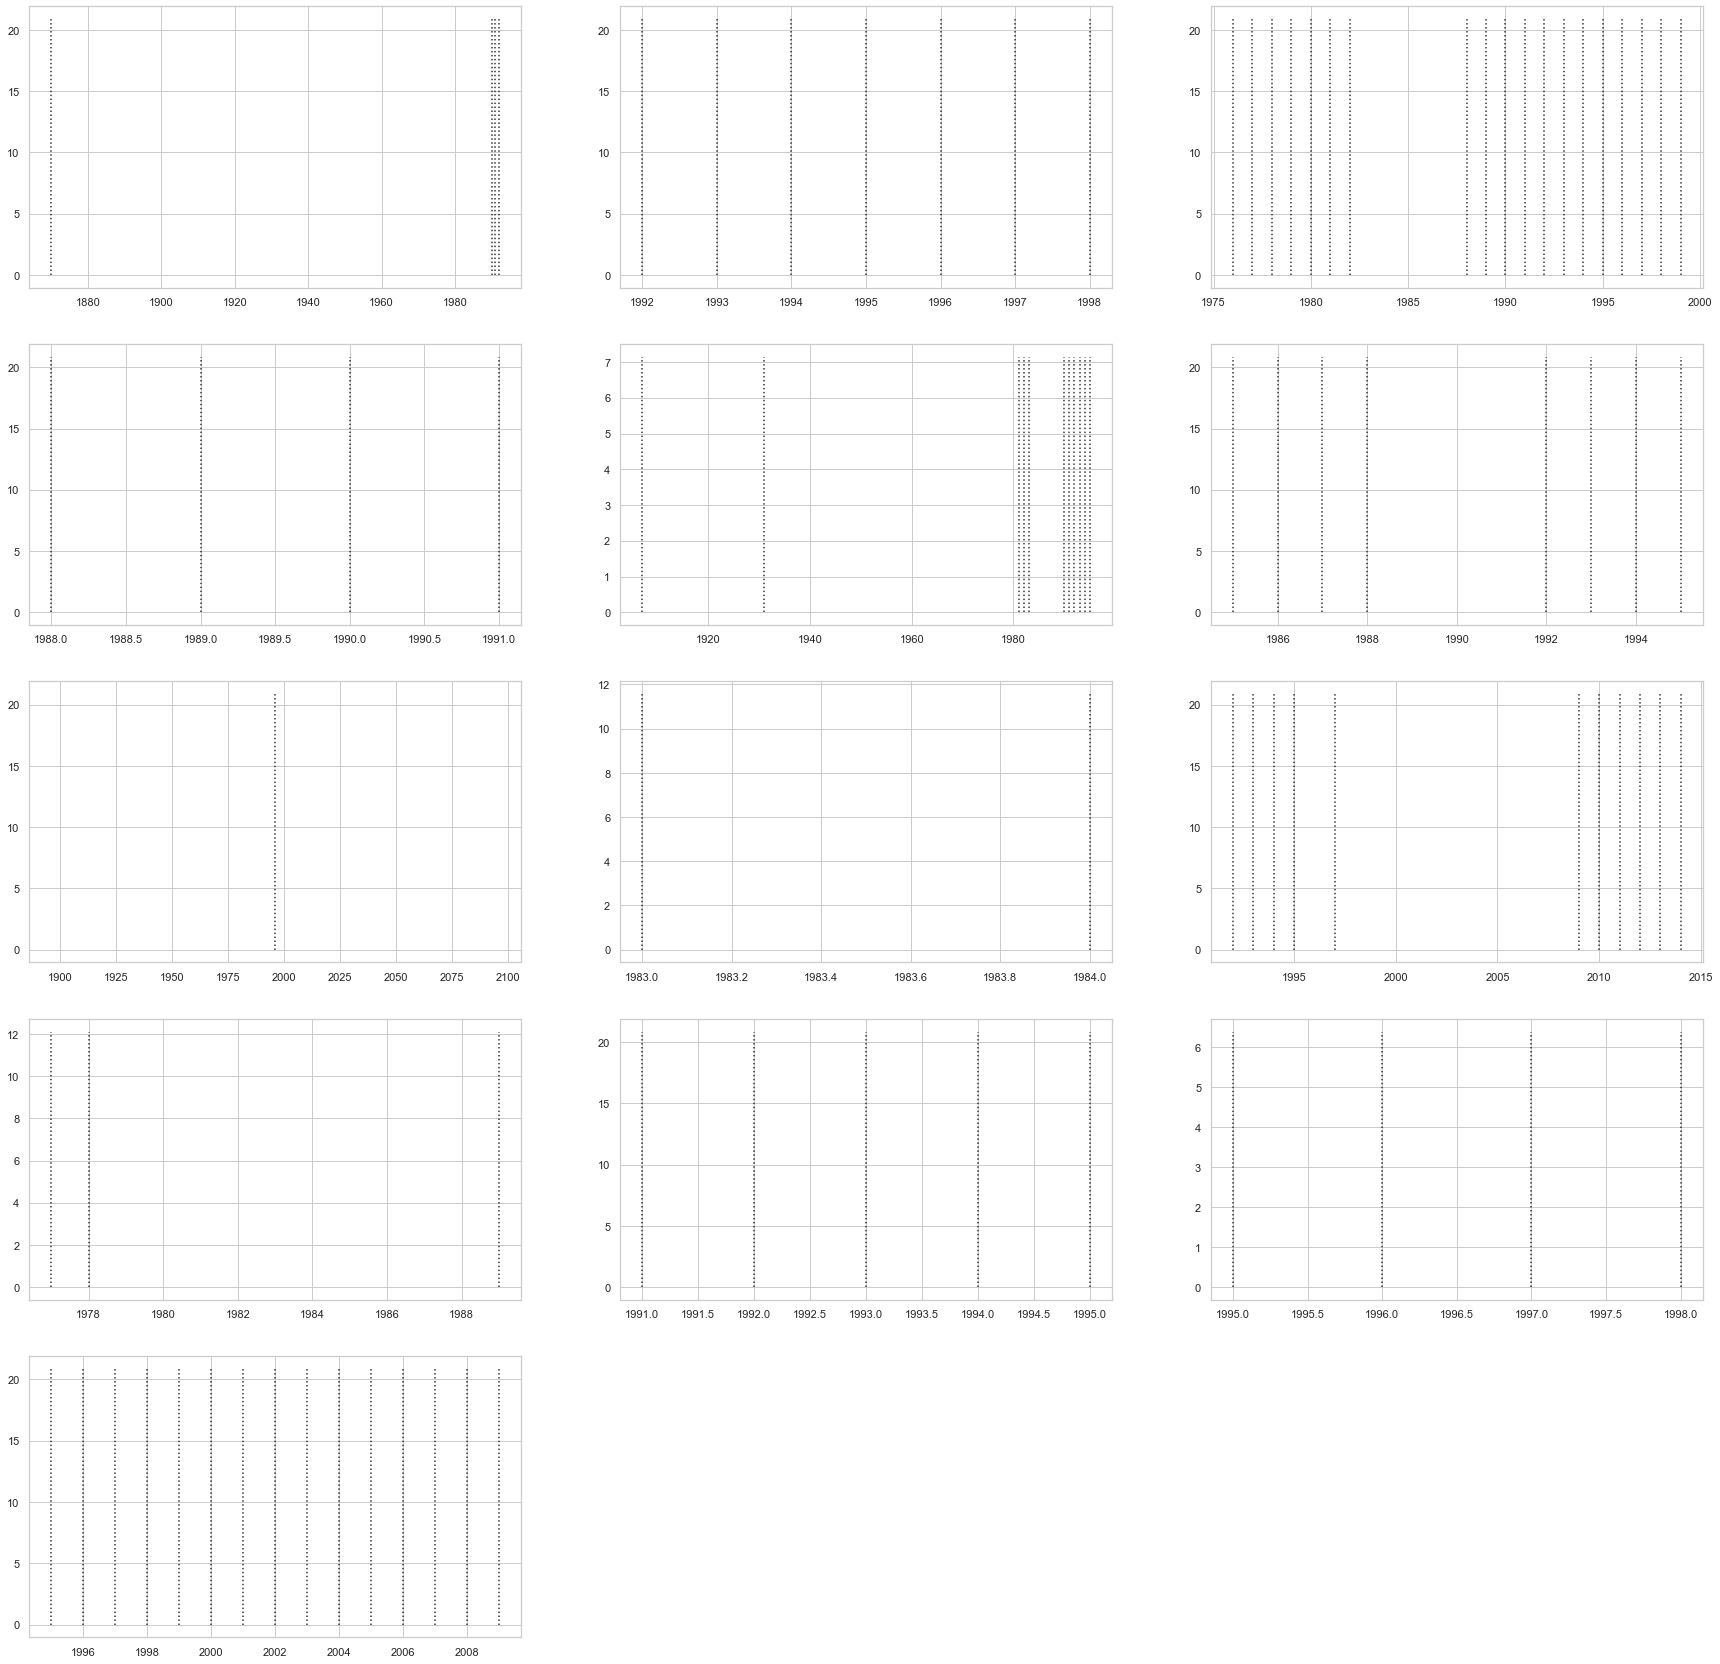

In [120]:
#crisis lines 
sns.set(style='whitegrid')
plt.figure(figsize=(30,30))
count = 1

for country in individual_countries:
    plt.subplot(5,3,count)
    count+=1
    print(country)
    plt.plot([(df[np.logical_and(df.country==country,df.banking_crisis==1)]['year'].unique()),
                  (df[np.logical_and(df.country==country,df.banking_crisis==1)]['year']).unique()],\
                 [0,np.max(df[df.country==country]['exch_usd'])],\
                 color='black',\
                 linestyle='dotted',\
                 alpha = 0.8)
     

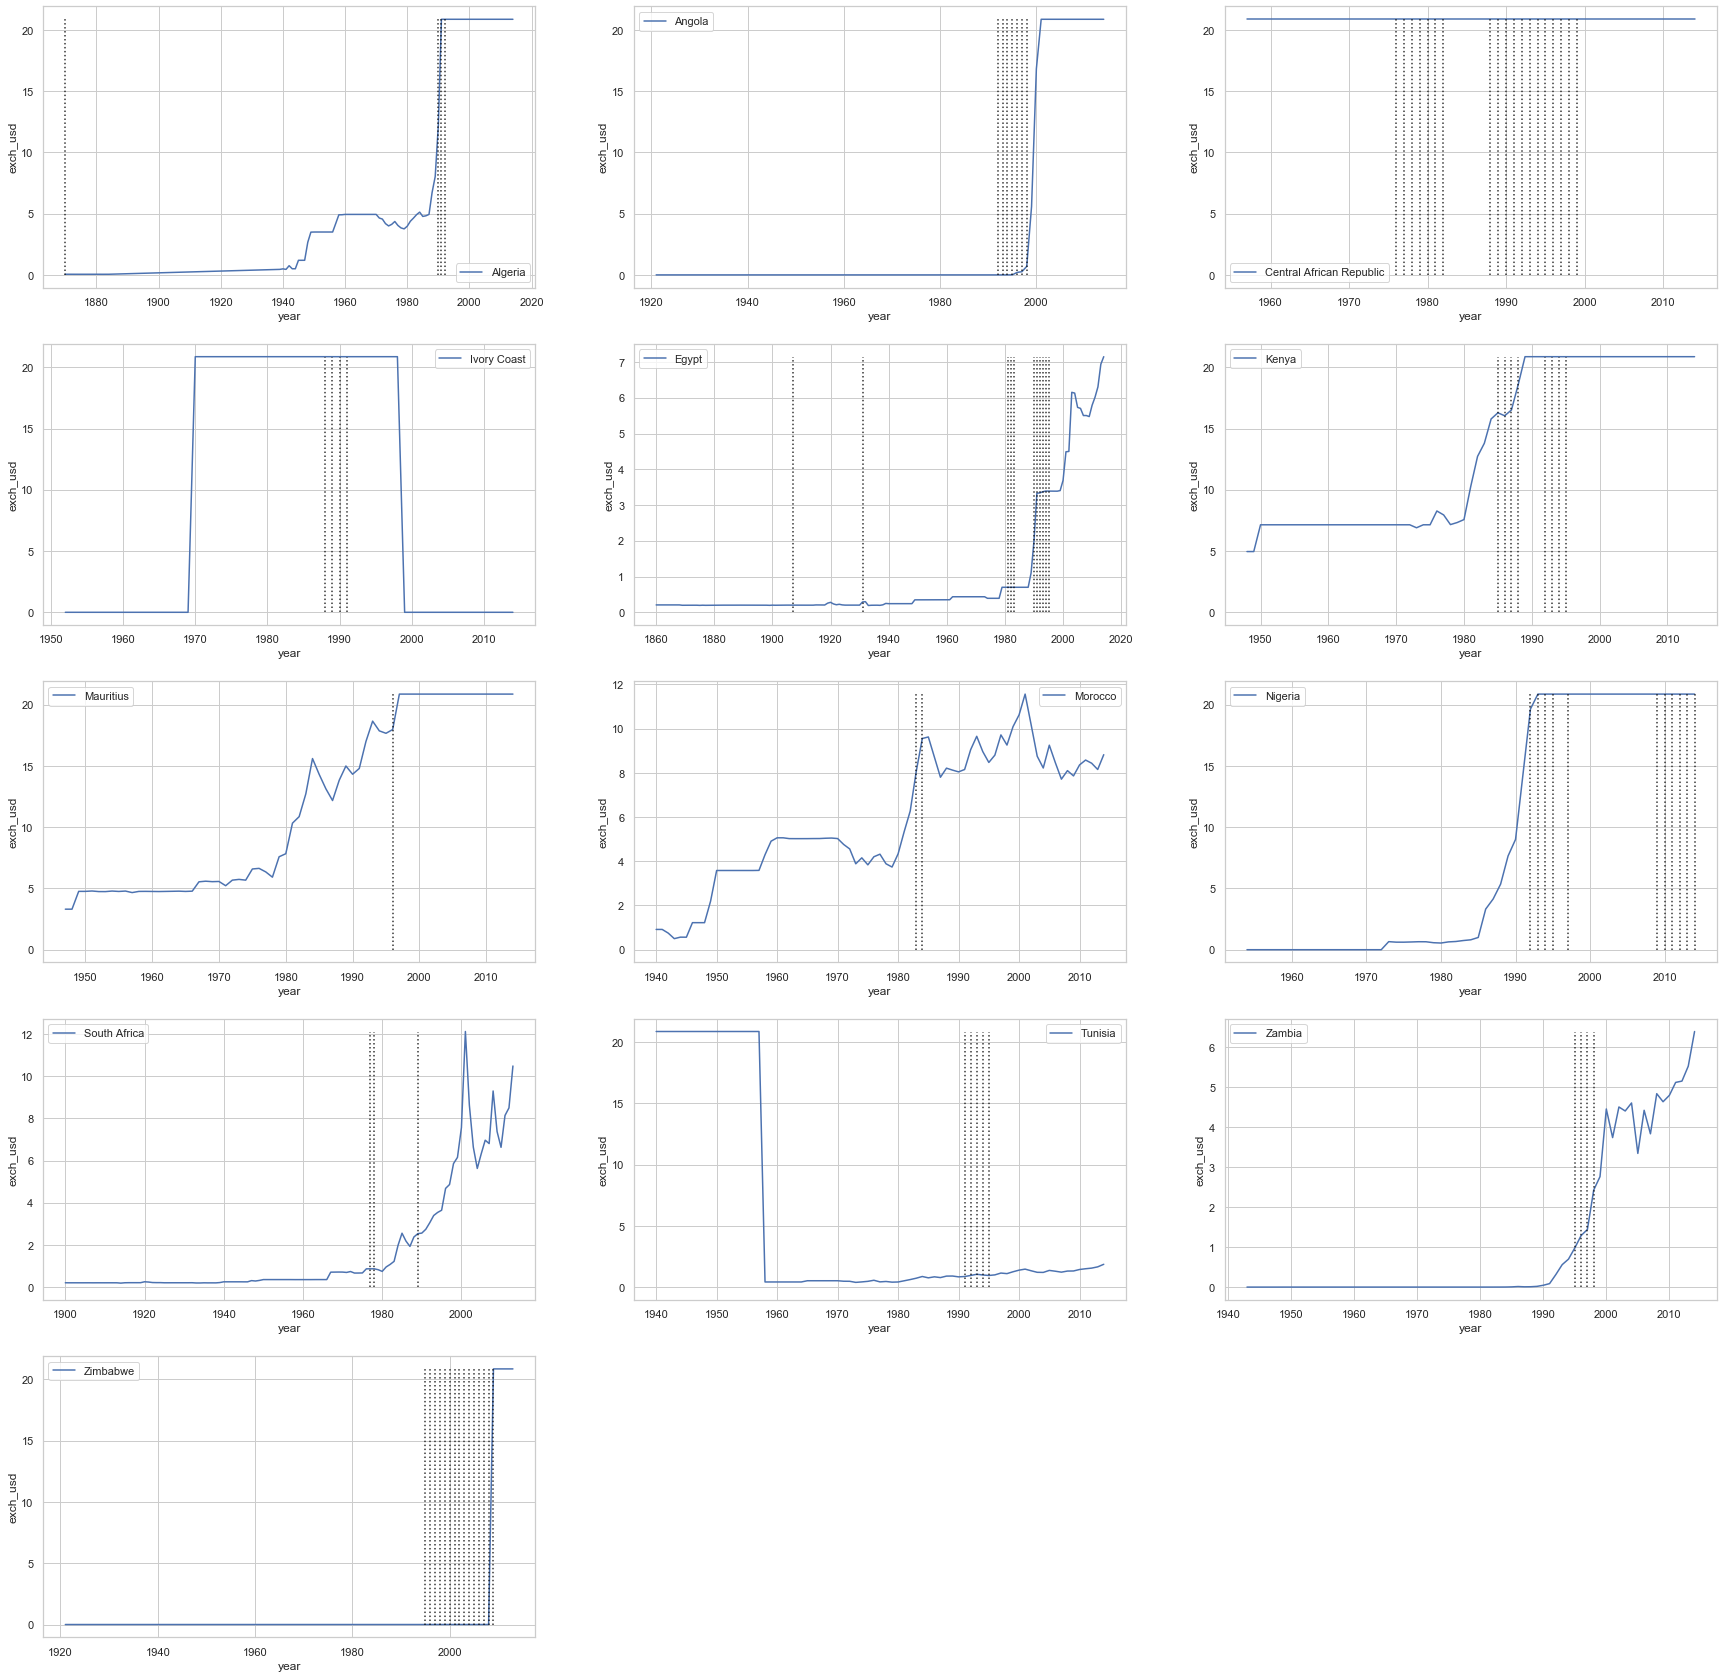

In [121]:
sns.set(style='whitegrid')
plt.figure(figsize=(30,30))

count = 1

for country in individual_countries:
    plt.subplot(5,3,count)
    count+=1
    
    sns.lineplot(df[df.country==country]['year'],
                 df[df.country==country]['exch_usd'],
                 label=country)              
            
    plt.plot([(df[np.logical_and(df.country==country,df.banking_crisis==1)]['year'].unique()),
                  (df[np.logical_and(df.country==country,df.banking_crisis==1)]['year']).unique()],
                 [0,np.max(df[df.country==country]['exch_usd'])],
                 color='black',
                 linestyle='dotted',
                 alpha = 0.8)    
    
  

    


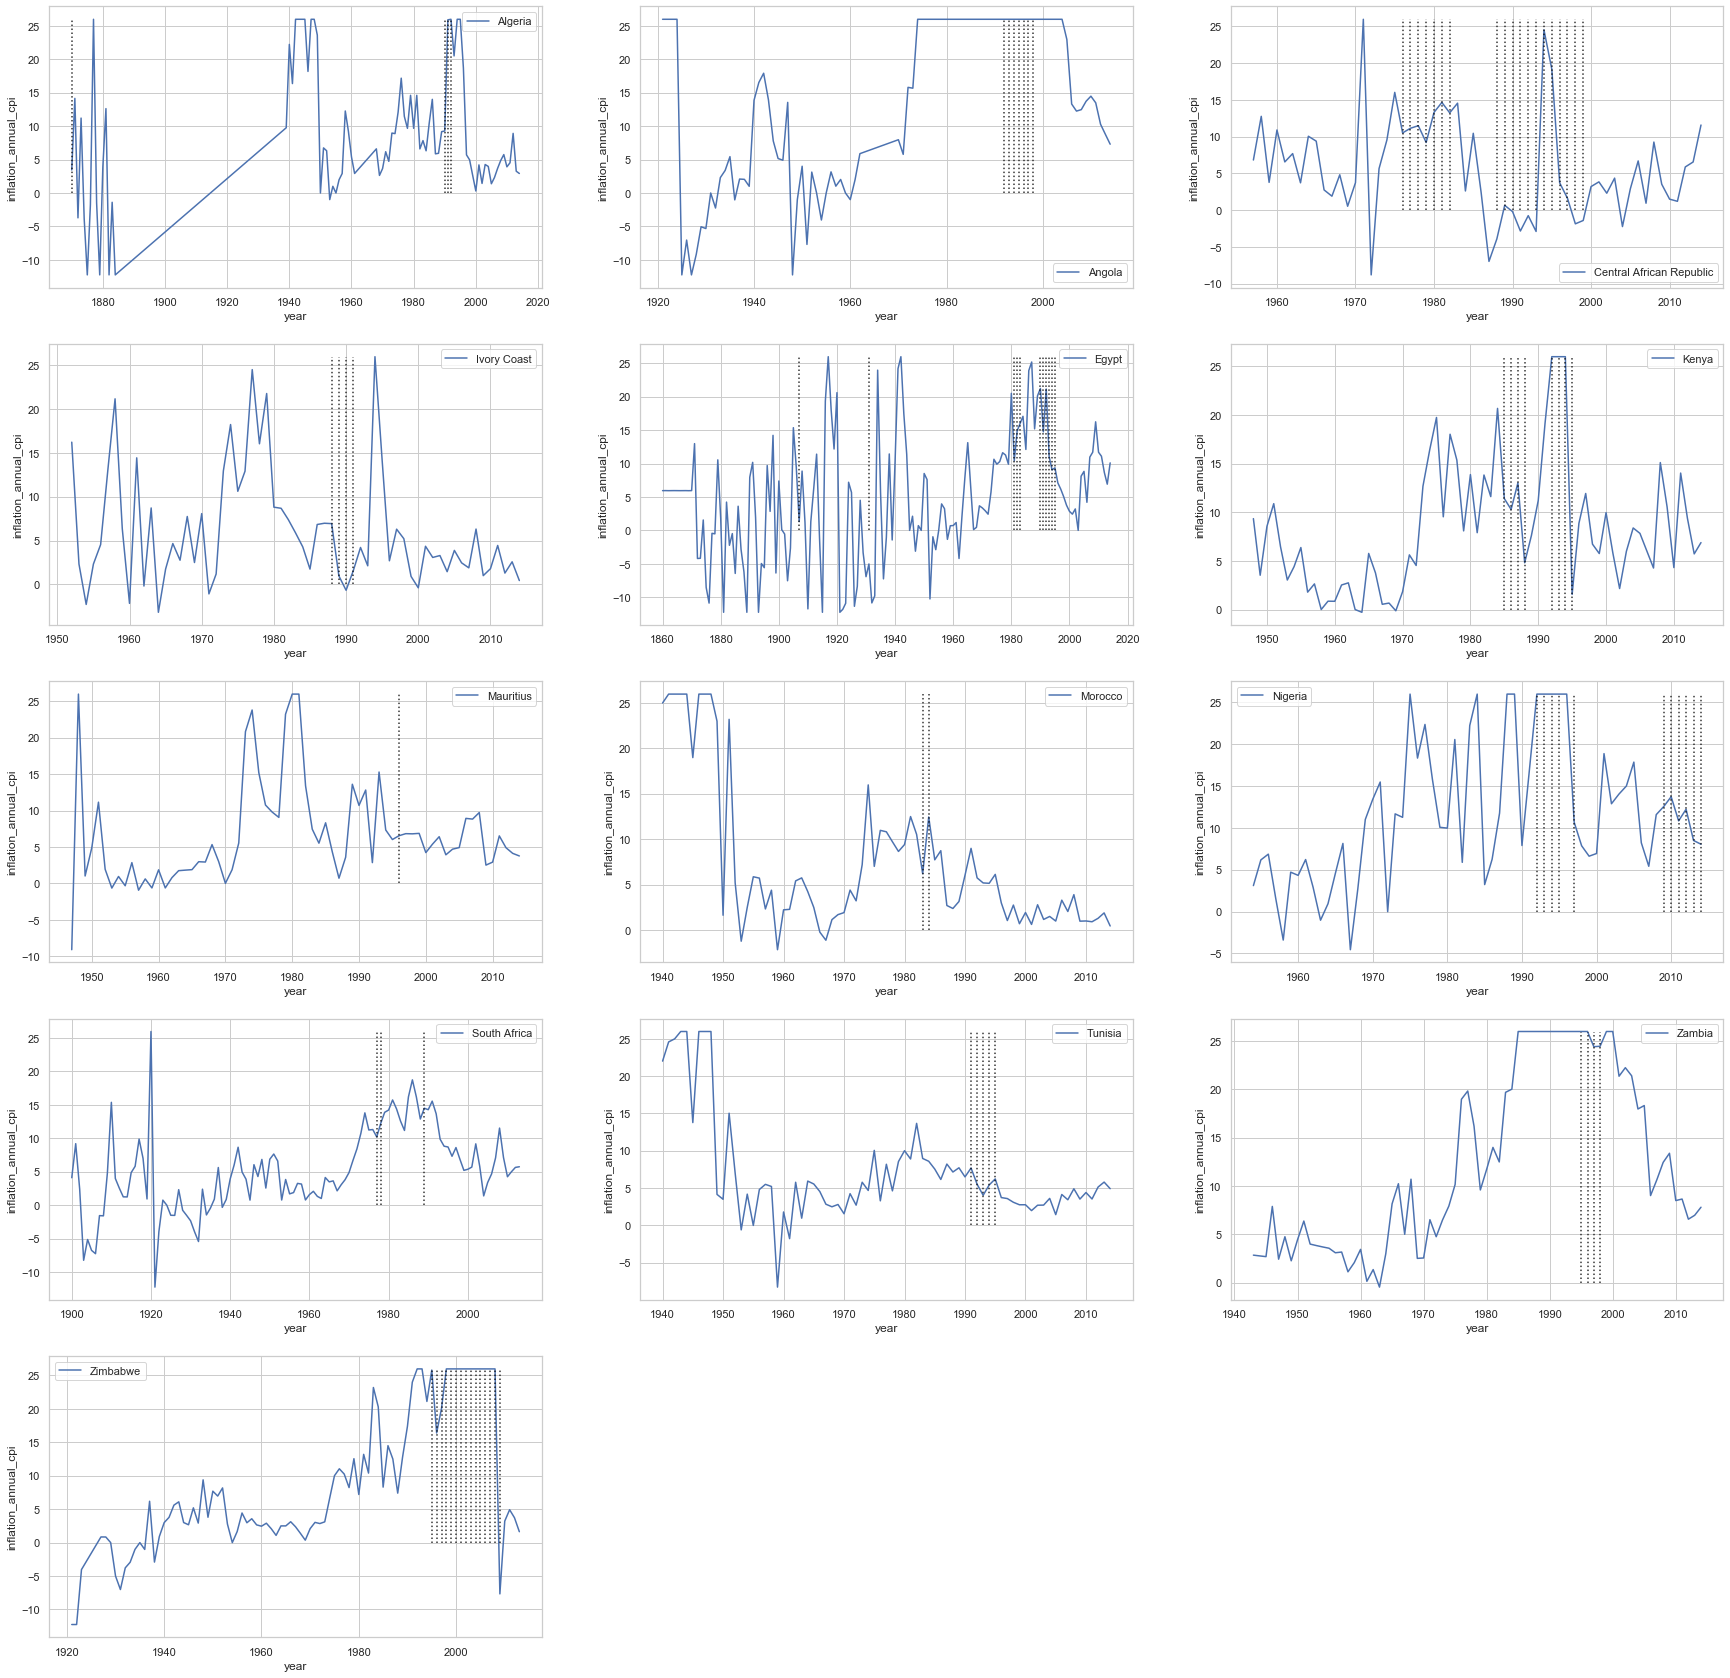

In [122]:
sns.set(style='whitegrid')
plt.figure(figsize=(30,30))

count = 1

for country in individual_countries:
    plt.subplot(5,3,count)
    count+=1
    
    sns.lineplot(df[df.country==country]['year'],
                 df[df.country==country]['inflation_annual_cpi'],
                 label=country)              
            
    plt.plot([(df[np.logical_and(df.country==country,df.banking_crisis==1)]['year'].unique()),
                  (df[np.logical_and(df.country==country,df.banking_crisis==1)]['year']).unique()],
                 [0,np.max(df[df.country==country]['inflation_annual_cpi'])],
                 color='black',
                 linestyle='dotted',
                 alpha = 0.8)   
    
    
  

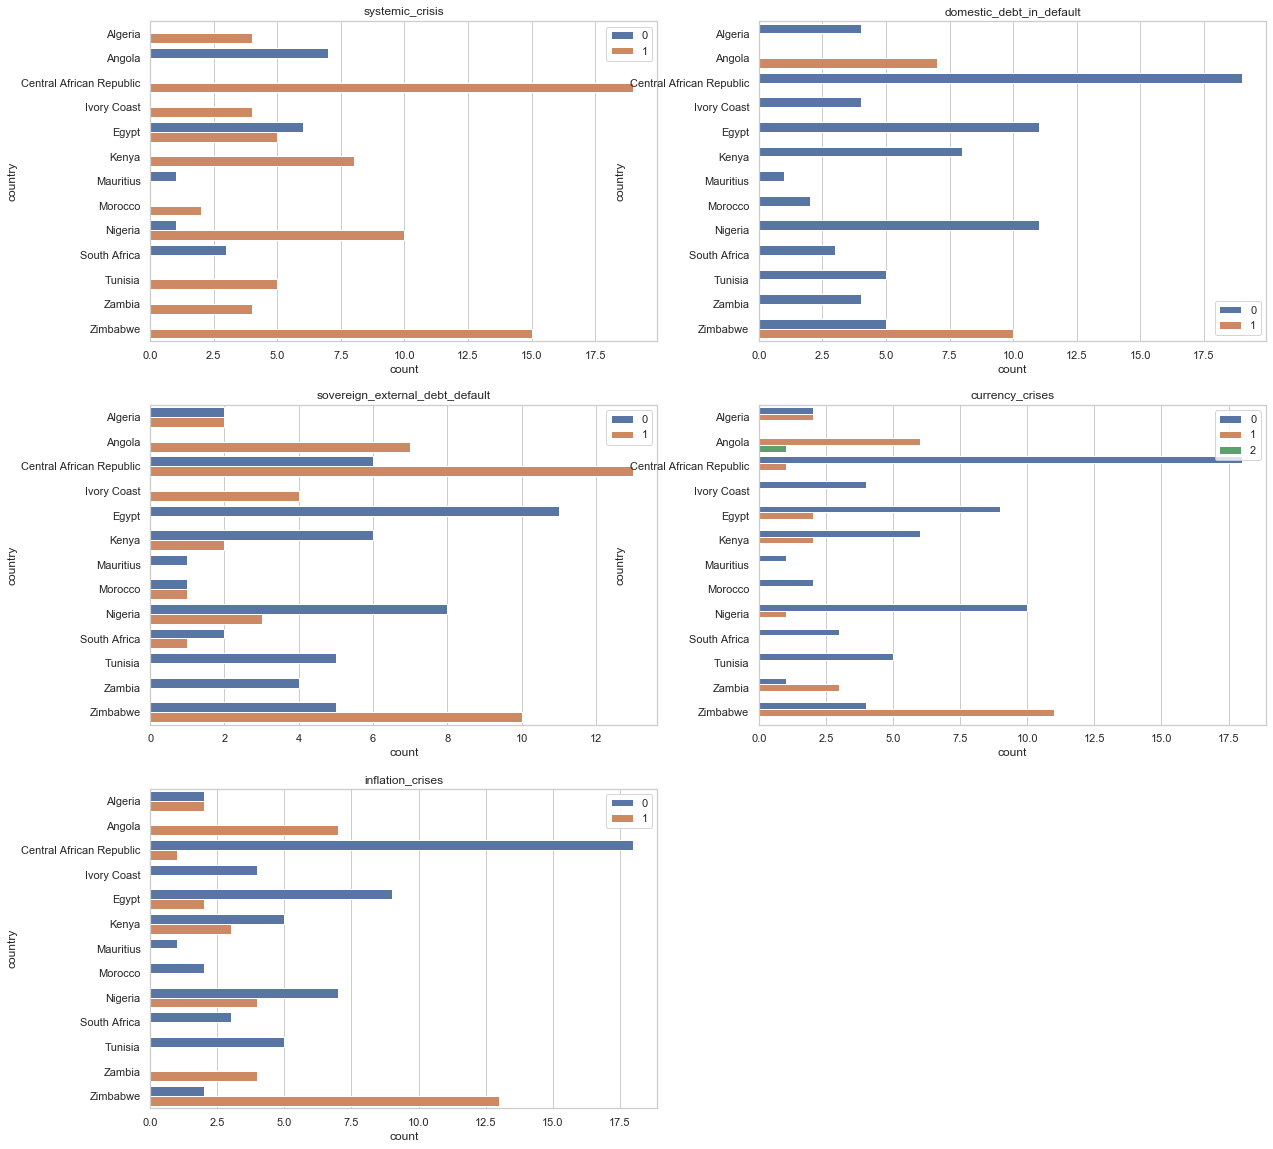

In [180]:
#0 stands for 'did not event occured', 1 for 'event occured'
sns.set(style='whitegrid')
cols_countplot=['systemic_crisis','domestic_debt_in_default','sovereign_external_debt_default','currency_crises','inflation_crises']
plt.figure(figsize=(20,20))
count = 1
df_bank_crisis = df.loc[df['banking_crisis'] == 1]

for col in cols_countplot:
    plt.subplot(3,2,count)    
    count+= 1
    sns.countplot(y='country', hue = col, data = df_bank_crisis).set_title(col)    
    plt.legend(loc = 0)
   


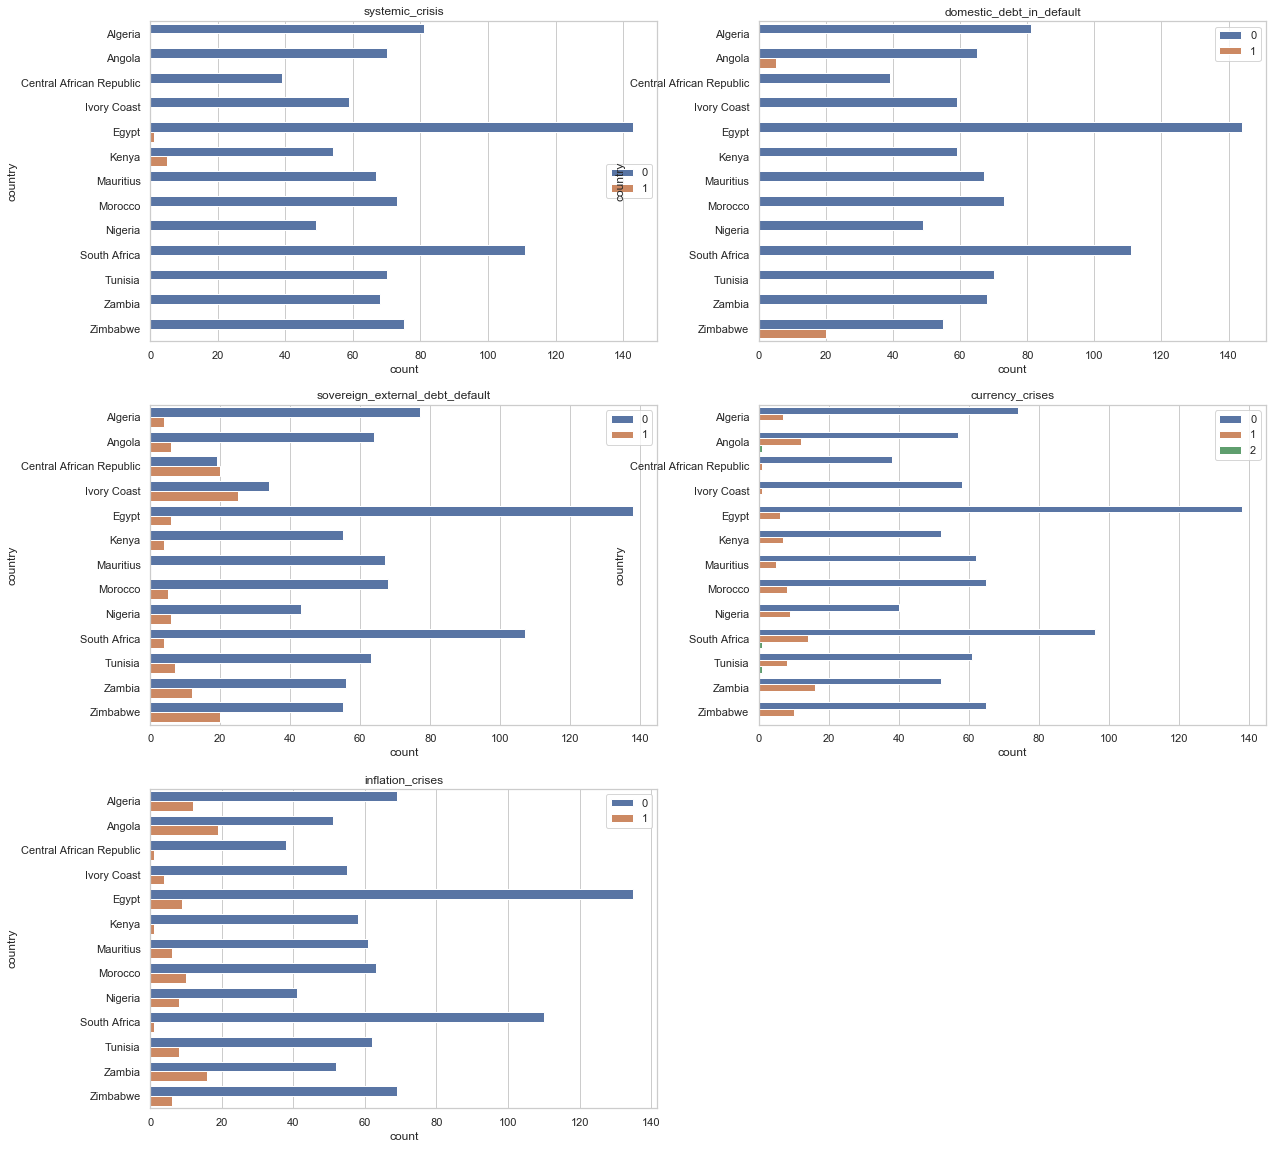

In [181]:
sns.set(style='whitegrid')
cols_countplot=['systemic_crisis','domestic_debt_in_default','sovereign_external_debt_default','currency_crises','inflation_crises']
plt.figure(figsize=(20,20))
count = 1
df_no_bank_crisis = df.loc[df['banking_crisis'] == 0]

for col in cols_countplot:
    plt.subplot(3,2,count)    
    count+= 1
    sns.countplot(y='country', hue = col, data = df_no_bank_crisis).set_title(col)    
    plt.legend(loc = 0)
   

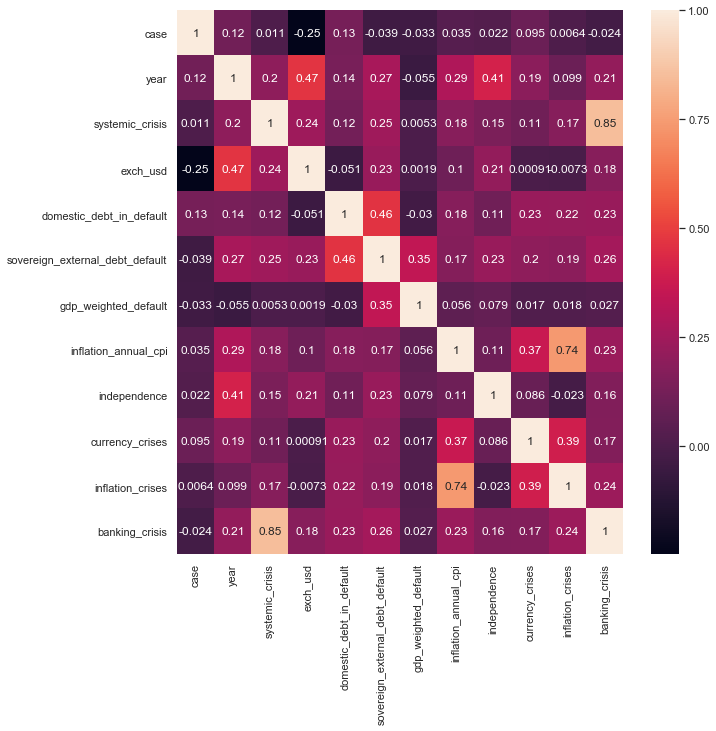

In [124]:
#only systemic crisis has a higher possitive correlation with banking crisis
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot = True)

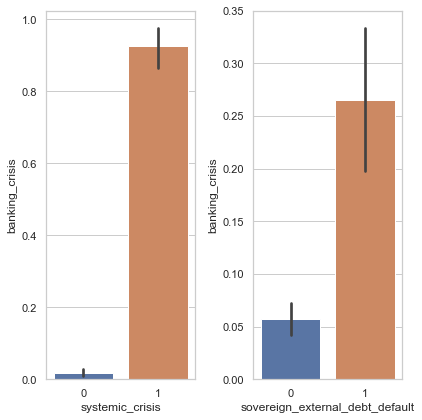

In [125]:
plt.figure(figsize=[6,6])
plt.subplot(121)
sns.barplot(x='systemic_crisis', y='banking_crisis', data=df)
plt.subplot(122)
sns.barplot(x='sovereign_external_debt_default', y='banking_crisis', data=df)
plt.tight_layout()

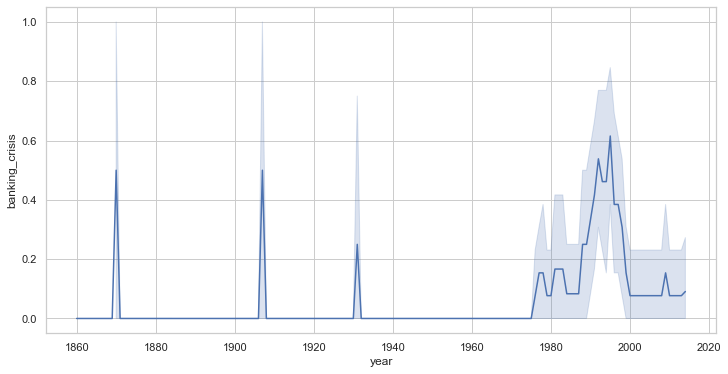

In [126]:
def_palette = sns.color_palette()
cat_palette = sns.color_palette("hls", 16)
fig, ax = plt.subplots(figsize = (12,6)) 
fig = sns.lineplot(x='year', y='banking_crisis', data=df, palette=cat_palette, ax=ax)
plt.title = 'Strength of crisis across African states'

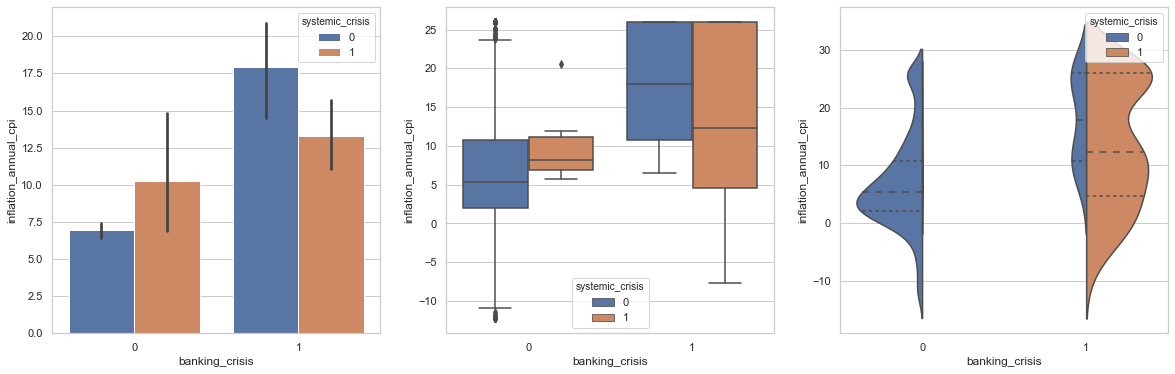

In [127]:
plt.figure(figsize=[20,6])
plt.subplot(131)
sns.barplot(x='banking_crisis', y='inflation_annual_cpi', hue='systemic_crisis', data=df);
plt.subplot(132)
sns.boxplot(x='banking_crisis', y='inflation_annual_cpi', hue='systemic_crisis', data=df);
plt.subplot(133)
sns.violinplot(x='banking_crisis', y='inflation_annual_cpi', hue='systemic_crisis', data=df, split=True, inner='quartile', scale='count');

In [128]:
#modelling part - logistic regression, decision trees and random forests, SVM

In [129]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report

### Logistic model

In [130]:
X = df.drop(['banking_crisis','cc3','country','year','case'], axis = 1)
y = df['banking_crisis']

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [132]:
logistic_model = LogisticRegression()

In [133]:
logistic_model.fit(X_train,y_train)

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [134]:
y_predict_logm = logistic_model.predict(X_test)

In [135]:
column_label = list(X_train.columns)
model_Coeff = pd.DataFrame(logistic_model.coef_, columns = column_label)
model_Coeff['intercept'] = logistic_model.intercept_
print("Coefficient Values Of The Surface Are: ", model_Coeff)

Coefficient Values Of The Surface Are:     systemic_crisis  exch_usd  domestic_debt_in_default  \
0         4.961856 -0.013591                  1.042746   

   sovereign_external_debt_default  gdp_weighted_default  \
0                         0.344039              0.218069   

   inflation_annual_cpi  independence  currency_crises  inflation_crises  \
0              0.034613      0.160256         0.192853          0.386993   

   intercept  
0  -3.982009  


In [136]:
logmodel_score = logistic_model.score(X_test,y_test)
print('Model score:\n', logmodel_score)

Model score:
 0.9842767295597484


In [137]:
print(metrics.confusion_matrix(y_test, y_predict_logm)) #22 = true positive, 291 = true negative, 2 = false positive, 3 = false negative

[[291   2]
 [  3  22]]


In [138]:
print(classification_report(y_test,y_predict_logm))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       293
           1       0.92      0.88      0.90        25

    accuracy                           0.98       318
   macro avg       0.95      0.94      0.94       318
weighted avg       0.98      0.98      0.98       318



### Decision Tree

In [139]:
from sklearn.tree import DecisionTreeClassifier

In [140]:
decision_tree = DecisionTreeClassifier()

In [141]:
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [142]:
y_predict_tree = decision_tree.predict(X_test)

In [143]:
from sklearn.metrics import classification_report,confusion_matrix

In [144]:
print(metrics.confusion_matrix(y_test, y_predict_tree))

[[286   7]
 [  3  22]]


In [145]:
print(classification_report(y_test,y_predict_tree))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       293
           1       0.76      0.88      0.81        25

    accuracy                           0.97       318
   macro avg       0.87      0.93      0.90       318
weighted avg       0.97      0.97      0.97       318



In [146]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list( df.drop(['banking_crisis','cc3','country','year','case'], axis = 1))
features

['systemic_crisis',
 'exch_usd',
 'domestic_debt_in_default',
 'sovereign_external_debt_default',
 'gdp_weighted_default',
 'inflation_annual_cpi',
 'independence',
 'currency_crises',
 'inflation_crises']

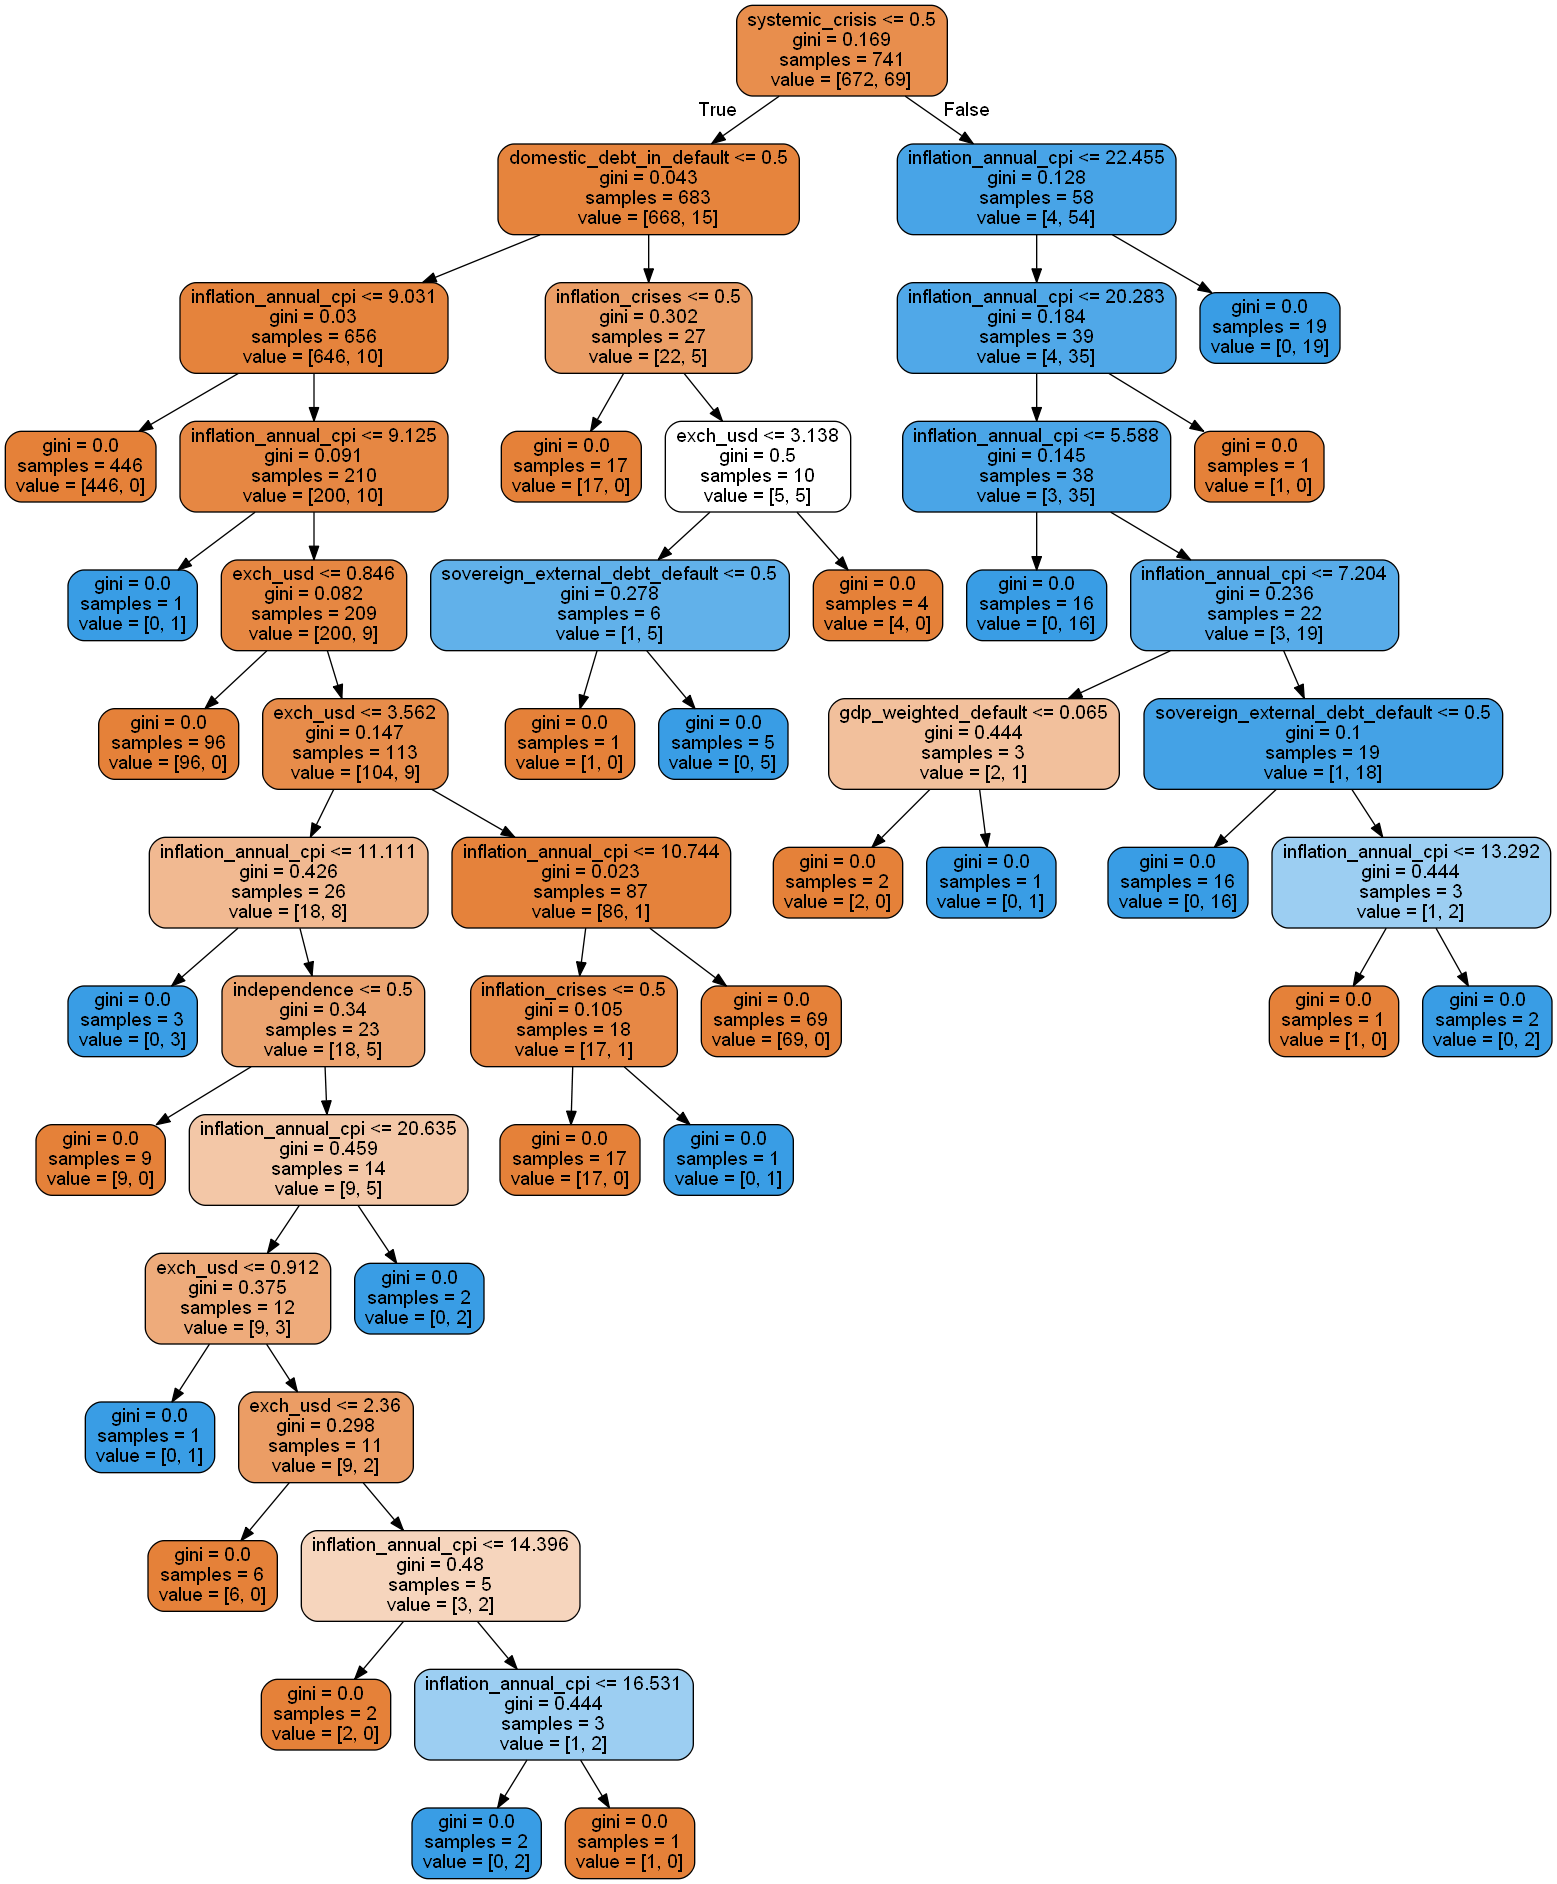

In [147]:
dot_data = StringIO()  
export_graphviz(decision_tree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

### Random Forests

In [148]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [149]:
rfc_pred = rfc.predict(X_test)

In [150]:
print(confusion_matrix(y_test,rfc_pred))

[[293   0]
 [  2  23]]


In [151]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       293
           1       1.00      0.92      0.96        25

    accuracy                           0.99       318
   macro avg       1.00      0.96      0.98       318
weighted avg       0.99      0.99      0.99       318



### SVM

In [152]:
from sklearn.svm import SVC

In [153]:
svc_model = SVC()

In [154]:
svc_model.fit(X_train,y_train)

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [155]:
svm_pred = svc_model.predict(X_test)

In [156]:
print(confusion_matrix(y_test,svm_pred))

[[292   1]
 [ 12  13]]


In [157]:
print(classification_report(y_test,svm_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       293
           1       0.93      0.52      0.67        25

    accuracy                           0.96       318
   macro avg       0.94      0.76      0.82       318
weighted avg       0.96      0.96      0.95       318



In [158]:
#Grid Search
from sklearn.model_selection import GridSearchCV

In [159]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]} 

In [160]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...........

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ..................................... C=1, gamma=1, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ................................... C=1, gamma=0.1, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ................................... C=1, gamma=0.1, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ................................... C=1, gamma=0.1, total=   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] .................................. C=1, gamma=0.01, total=   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] .................................. C=1, gamma=0.01, total=   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] .................................. C=1, gamma=0.01, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.3s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [161]:
grid_pred = grid.predict(X_test)

In [162]:
print(confusion_matrix(y_test,grid_pred))

[[292   1]
 [  2  23]]


In [163]:
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       293
           1       0.96      0.92      0.94        25

    accuracy                           0.99       318
   macro avg       0.98      0.96      0.97       318
weighted avg       0.99      0.99      0.99       318



### K-Means Clustering

In [164]:
from sklearn.cluster import KMeans

In [165]:
kmeans = KMeans(n_clusters=2)

In [166]:
kmeans.fit(df.drop(['banking_crisis','cc3','country','year','case'], axis = 1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [167]:
kmeans.cluster_centers_

array([[2.07468880e-01, 2.02142083e+01, 3.31950207e-02, 3.15352697e-01,
        5.97510373e-03, 9.39663904e+00, 9.21161826e-01, 1.36929461e-01,
        1.41078838e-01],
       [3.91198044e-02, 1.88531901e+00, 4.15647922e-02, 1.05134474e-01,
        6.52811736e-03, 7.06554297e+00, 7.33496333e-01, 1.30806846e-01,
        1.25916870e-01]])

In [168]:
df['Cluster'] = df['banking_crisis']

In [169]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(df['Cluster'],kmeans.labels_))
print(classification_report(df['Cluster'],kmeans.labels_))

[[194 771]
 [ 47  47]]
              precision    recall  f1-score   support

           0       0.80      0.20      0.32       965
           1       0.06      0.50      0.10        94

    accuracy                           0.23      1059
   macro avg       0.43      0.35      0.21      1059
weighted avg       0.74      0.23      0.30      1059

